In [1]:
import spacy
import es_core_news_sm
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from collections import Counter
import statistics as stat
from langdetect import detect

In [2]:
genre = ''
tango = pd.read_csv(f'/mnt/s/stiven/proyects/final_cuanti/songs_by_genre/{genre}.tsv', sep='|', header=0,
                 names = ['id', 'song_name', 'artist', 'lyric', 'lyric_by_e'])
# # elmininar valores nulos
tango = tango.dropna(axis = 0, how ='any') 
# identificar el idioma
tango['lang'] = tango['lyric'].apply(detect)
# crear una columna con el tamaña de la letra en caracteres
tango["lyric_length"]= tango["lyric"].str.len()
# elimina canciones duplicadas
tango = tango.drop_duplicates(['song_name'])
# elminar canciones que no esten en español
indexLang = tango[tango['lang']!='es'].index
tango.drop(indexLang, inplace=True)
tango.head()

,id,song_name,artist,lyric,lyric_by_e,lang,lyric_length
0,1,Volver,Carlos Gardel,Yo adivino el parpadeo De las luces que a lo l...,Yo adivino el parpadeo De las luces que a lo l...,es,1223
1,2,Nostalgias,Carlos Gardel,Quiero emborrachar mi corazón Para apagar un l...,Quiero emborrachar mi corazón Para apagar un l...,es,1323
2,3,Cambalache,Carlos Gardel,"El mundo fue y será una porquería, ya lo sé En...","El mundo fue y será una porquería, ya lo sé En...",es,1404
3,4,El Día Que Me Quieras,Carlos Gardel,Acaricia mi ensueño el suave murmullo de tu su...,Acaricia mi ensueño el suave murmullo de tu su...,es,874
4,5,Mano A Mano,Carlos Gardel,"Rechiflado en mi tristeza, hoy te evoco y veo ...","Rechiflado en mi tristeza, hoy te evoco y veo ...",es,1483


In [3]:
tango['lang'].value_counts()

es    890
Name: lang, dtype: int64

In [4]:
a = tango['lyric'].str.lower().str.cat(sep=' ')
nlp = es_core_news_sm.load()
doc = nlp(a)

Moda: 992, Media: 915.4353205849269, Mediana: 883.0, Desviación estandar: 271.3652408849654
1er Q: 745.0, 2er Q: 883.0, 3er Q: 1050.0


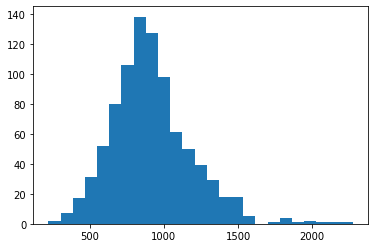

In [5]:
tango = tango.dropna(axis = 0, how ='any') 
dat = tango['lyric_length'].to_list()
sorted(dat, reverse=True).pop(0)
mdat = np.ma.masked_array(dat,np.isnan(dat))
mdat = np.delete(sorted(mdat, reverse=True), 0) #elminar el valor más grande


media_ly_lg = np.mean(mdat)
mediana_ly_lg = np.median(mdat)
moda_ly_lg = stat.mode(dat)
desv_estandar = np.std(mdat)
primerq = np.quantile(mdat, 0.25)
segundoq = np.quantile(mdat, 0.50)
tercerq = np.quantile(mdat, 0.75)
plt.hist(mdat, bins=25)

print(f'Moda: {moda_ly_lg}, Media: {media_ly_lg}, Mediana: {mediana_ly_lg}, Desviación estandar: {desv_estandar}')
print(f'1er Q: {primerq}, 2er Q: {segundoq}, 3er Q: {tercerq}')

{'whiskers': [<matplotlib.lines.Line2D at 0x7fbe51918940>,
 'caps': [<matplotlib.lines.Line2D at 0x7fbe51918fa0>,
 'boxes': [<matplotlib.lines.Line2D at 0x7fbe51918790>],
 'medians': [<matplotlib.lines.Line2D at 0x7fbe5194f4c0>],
 'fliers': [<matplotlib.lines.Line2D at 0x7fbe5194f790>],
 'means': []}

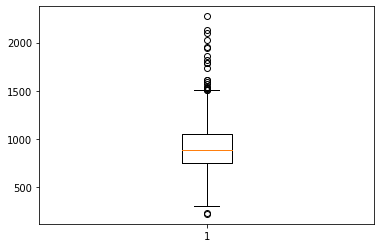

In [6]:
plt.boxplot(mdat)

In [7]:
from collections import Counter
words = [token.text
         for token in doc
         if not token.is_stop and not token.is_punct]

# noun tokens that arent stop words or punctuations
nouns = [token.text
         for token in doc
         if (not token.is_stop and
             not token.is_punct and
             token.pos_ == "NOUN")]

word_freq = Counter(words)
common_words = word_freq.most_common(5)
word_freq.pop('y')
word_freq.pop(' ')
word_freq.pop('a')

2542

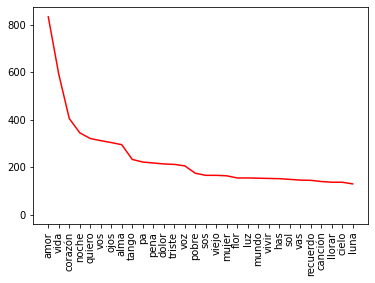

In [10]:
data = word_freq.most_common(30)

word = []
frequency = []

for i in range(len(data)):
  word.append(data[i][0])
  frequency.append(data[i][1])

width = 1.0 
fig, ax = plt.subplots()
ax.set_xticklabels(word, rotation=90)
ax.plot(word, frequency, width, color='r' )
plt.show()

In [11]:
data = word_freq.most_common(80)

print(data)

[('amor', 833), ('vida', 591), ('corazón', 405), ('noche', 345), ('quiero', 321), ('vos', 312), ('ojos', 304), ('alma', 295), ('tango', 233), ('pa', 222), ('pena', 218), ('dolor', 214), ('triste', 212), ('voz', 206), ('pobre', 175), ('sos', 166), ('viejo', 166), ('mujer', 164), ('flor', 155), ('luz', 155), ('mundo', 154), ('vivir', 153), ('has', 152), ('sol', 149), ('vas', 146), ('recuerdo', 145), ('canción', 140), ('llorar', 137), ('cielo', 137), ('luna', 130), ('barrio', 128), ('o', 123), ('querer', 121), ('noches', 121), ('dios', 116), ('vieja', 113), ('camino', 107), ('viento', 103), ('olvido', 102), ('boca', 101), ('vi', 101), ('manos', 100), ('loco', 98), ('ilusión', 96), ('adiós', 96), ('sueño', 94), ('amores', 93), ('siento', 93), ('ay', 92), ('beso', 91), ('cariño', 91), ('volver', 91), ('aires', 91), ('feliz', 90), ('soledad', 89), ('estás', 89), ('piel', 89), ('casa', 88), ('milonga', 88), ('fuiste', 87), ('penas', 87), ('calle', 85), ('hombre', 84), ('canto', 83), ('dulce',